In [1]:
!pip install gradio huggingface_hub datasets joblib torch>=1.7.0 torchvision>=0.8.1 PyYAML>=5.3.1 requests>=2.23.0 Pillow

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14492, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 14492 (delta 32), reused 41 (delta 21), pack-reused 14430
Receiving objects: 100% (14492/14492), 13.48 MiB | 21.34 MiB/s, done.
Resolving deltas: 100% (10014/10014), done.


In [3]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.7 MB/s 


In [4]:
import torch

import gradio as gr

from huggingface_hub import hf_hub_download

from PIL import Image

In [5]:
REPO_ID = "vcasadei/yolov5-banana-defect-detection"
FILENAME = "best.pt"

yolov5_weights = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)

Downloading:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

In [6]:
yolov5_weights

'/root/.cache/huggingface/hub/models--vcasadei--yolov5-banana-defect-detection/snapshots/2820916dac85dcb81063c86fd6e13e3699b36060/best.pt'

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=yolov5_weights, force_reload=True)  # local repo

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
INFO:yolov5:YOLOv5 🚀 2022-10-29 Python-3.7.15 torch-1.12.1+cu113 CPU

YOLOv5 🚀 2022-10-29 Python-3.7.15 torch-1.12.1+cu113 CPU



[Errno 2] No such file or directory: '/usr/local/lib/python3.7/dist-packages/urllib3-1.24.3.dist-info/METADATA'


INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [15]:
def object_detection(im, size=640):
    results = model(im)  # inference
    results.print()  # print results to screen
    results.show()  # display results
    #results.save()  # save as results1.jpg, results2.jpg... etc.
    results.render()  # updates results.imgs with boxes and labels
    print(results)
    return results

In [9]:
title = "Classificação de Banana"
description = """Esse modelo é uma pequena demonstração baseada em uma análise de cerca de 60 imagens somente. Para resultados mais confiáveis e genéricos, são necessários mais exemplos (imagens).
"""

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.6p1)
Connected (version 2.0, client OpenSSH_7.6p1)
INFO:paramiko.transport:Authentication (publickey) successful!
Authentication (publickey) successful!


Running on public URL: https://98975755077ba8cf.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


INFO:yolov5:image 1/1: 640x640 2 defects
Speed: 4.1ms pre-process, 333.2ms inference, 0.9ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 2 defects
Speed: 4.1ms pre-process, 333.2ms inference, 0.9ms NMS per image at shape (1, 3, 640, 640)


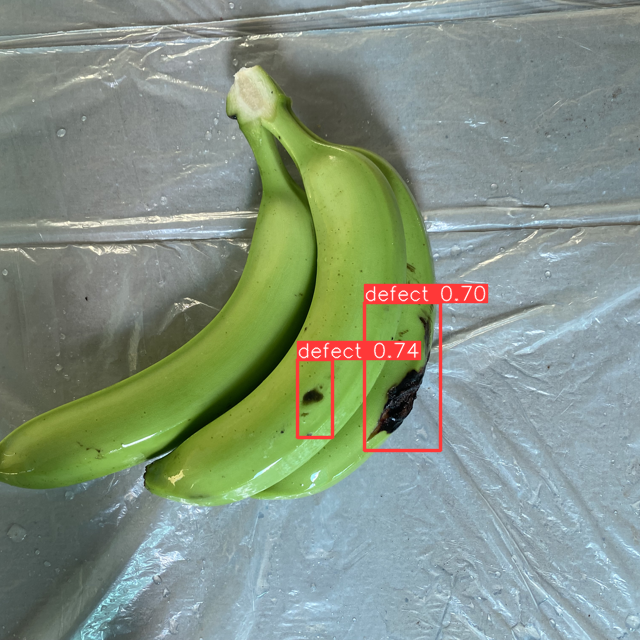

image 1/1: 640x640 2 defects
Speed: 4.1ms pre-process, 333.2ms inference, 0.9ms NMS per image at shape (1, 3, 640, 640)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 284, in run_predict
    fn_index, raw_input, username, session_state, iterators
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 937, in process_api
    data = self.postprocess_data(fn_index, result["prediction"], state)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 883, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "/usr/local/lib/python3.7/dist-packages/gradio/components.py", line 1398, in postprocess
    raise ValueError("Cannot process this value as an Image")
ValueError: Cannot process this value as an Image


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f4b7efb8210>,
 'http://127.0.0.1:7860/',
 'https://98975755077ba8cf.gradio.app')

In [16]:
image = gr.inputs.Image(shape=(640, 640), image_mode="RGB", source="upload", label="Imagem", optional=False)
outputs = gr.outputs.Image(type="pil", label="Output Image")

gr.Interface(
    fn=object_detection,
    inputs=image,
    outputs=outputs,
    title=title,
    description=description,
).launch(debug=True)